# Librairies

In [1]:
import pandas as pd
import random
import numpy as np
import time
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Importation des données

In [2]:
data = pd.read_csv("dons_live_total.csv")

In [3]:
data.shape

(23761, 13)

In [4]:
data.head()

,nom_chaine,video_ID,video_titre,date_publi,delta_jour,duree_live,total_don,nbr_don,mean_don,mean_don_heure,nbr_view,nbr_like,nbr_com_live
0,Université de Technologie de Troyes,-7XQ0pRMomA,Live QX01 : Chapter 10 : On the Schrodinger Eq...,2021-05-18,319,3473.0,0.0,0,0.0,0.0,255,6.0,0
1,Université de Technologie de Troyes,xs31lYQ2iLU,Live course QX01 : Chapter 9 partie 1 : Deutsc...,2021-05-11,326,3310.0,0.0,0,0.0,0.0,230,4.0,0
2,Université de Technologie de Troyes,yEb2_UY-3ow,Live course QX01 : Chapter 8 : Quantum Algorit...,2021-05-04,333,6914.0,0.0,0,0.0,0.0,356,5.0,0
3,Université de Technologie de Troyes,Podq2qNjxMM,Live course QX01 : Chapter 6 : Quantum Gates,2021-04-06,361,6994.0,0.0,0,0.0,0.0,323,7.0,0
4,Université de Technologie de Troyes,6GO3IL4W-SE,"UTT :: Tout savoir sur la ""la soutenabilité et...",2021-04-03,364,2846.0,0.0,0,0.0,0.0,197,7.0,0


Nous avons donc une base de données avec 23761 vidéos et 13 variables qui leurs sont associées.

# Tri des lives

Cependant, nous ne pouvons pas toutes les garder car certaines ne sont pas des vraies replay de chat mais seulement des vidéos mise en avant première sur Youtube. Il faut donc faire un premier tri. On estime qu'un live dure plus de 30 minutes. On va donc supprimer toutes les lignes dont la durée est inférieur à 1800 secondes.

In [5]:
indexNames = data[ data['duree_live'] <= 1800 ].index

In [6]:
len(indexNames)

1993

In [7]:
data2 = data.drop(indexNames)

In [8]:
data2.shape

(21768, 13)

Nous avons supprimé les 1993 vidéos dont la durée était inférieur ou égale à 30 minutes.

#

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duree_live'>

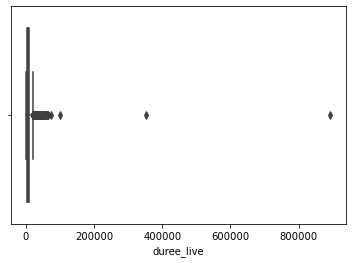

In [9]:
#idx_outliers = data['duree_live']>200000
#data.drop(data[idx_outliers].index, inplace = True)
sns.boxplot(data["duree_live"])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duree_live'>

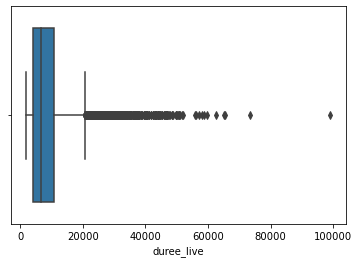

In [10]:
idx_outliers = data2['duree_live']>200000
data2.drop(data2[idx_outliers].index, inplace = True)
sns.boxplot(data2["duree_live"])

# Datatime

On remet en format datatime la colonne date_publi

In [11]:
data2['date_publi'] = pd.to_datetime(data2['date_publi'])

On enregistre notre nouvelle base de données.

In [12]:
data2.to_csv("dons_live_total_II.csv", index = False)

___

# Graphiques

In [13]:
import plotly.express as px
# Here we use a column with categorical data
fig = px.histogram(data2, x="nom_chaine",title = "Histogramme représentant le nombre de lives par chaine")
fig.show()

Ici, nous allons garder seulement les lives qui ont succités des dons.

In [14]:
data_dons = data2[data2["total_don"] != 0]

In [15]:
data_dons

,nom_chaine,video_ID,video_titre,date_publi,delta_jour,duree_live,total_don,nbr_don,mean_don,mean_don_heure,nbr_view,nbr_like,nbr_com_live
18,Call of Duty: Quartier Général,X2PACIRWthU,[LIVE 🔴] CALL OF DUTY: VANGUARD - MULTIJOUEURS...,2021-09-07,207,2735.0,59.97,3,19.99,78.94,12559,458.0,19
19,Call of Duty: Quartier Général,YBJcnXnmP0Y,[LIVE 🔴] CALL OF DUTY: VANGUARD - ÉVÈNEMENT RE...,2021-08-19,226,3029.0,1.99,1,1.99,2.37,16395,555.0,24
21,Call of Duty: Quartier Général,w_JygXs8S-E,[LIVE 🔴] ÉVÈNEMENT NUCLÉAIRE WARZONE - *NOUVEL...,2021-04-21,346,4985.0,6.00,2,3.00,4.33,45690,572.0,43
26,Frigiel,s1UGoczL1g0,Hyrule Warriors : L'ère du Fléau #FIN | LE SAC...,2020-11-26,492,8606.0,1.42,1,1.42,0.59,104302,2331.0,139
30,Frigiel,rpX9Kpx40Gw,Hyrule Warriors : L'ère du Fléau #03 | LA LAME...,2020-11-22,496,7754.0,5.00,1,5.00,2.32,57877,1591.0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23729,Yannosh51,NAGtjOYjKF4,"Quoi qu'il arrive, on coupe a minuit !",2021-03-09,396,9876.0,5.49,1,5.49,2.00,1166,44.0,14
23730,Yannosh51,3QyKalkTs_Y,Le live inutile du vendredi,2021-03-06,399,13095.0,5.00,1,5.00,1.37,928,45.0,4
23731,Yannosh51,KXR1S56iIYw,"Libre antenne, 1h et puis c'est tout",2021-03-03,402,3576.0,10.00,1,10.00,10.07,1315,53.0,4
23732,Yannosh51,nGaRAT0KBgc,Le live PAS inutile du vendredi #11 avec l'équ...,2021-02-27,406,13425.0,2.71,2,1.35,0.73,4431,216.0,61


In [16]:
data_dons.shape

(8145, 13)

In [54]:
#data2[data2["total_don"] > 10]

In [17]:
data2[data2["total_don"] == 0].shape[0]

13621

In [18]:
names = ['Nombre de vidéos live ayant eu aucun don', 'Nombre de vidéos live ayant eu des dons'] 
fig = px.pie(values=[data2[data2["total_don"] == 0].shape[0],data2[data2["total_don"] != 0].shape[0]] , names=names, title ="Proportion des vidéos ayant eu ou non des dons") 
fig.show()

In [57]:
#data_dons.groupby(['nom_chaine'])['total_don'].agg(['count', 'sum'])

In [19]:
fig = px.histogram(data_dons, x="nom_chaine", y = 'total_don',title="Dons totaux par chaîne")
fig.show()

# Regrouper les vidéos par chaîne

Il est plus pertinent de regroupes toutes les vidéos par rapport à la chaîne qui les ont émises afin de pouvoir étudier directement les chaînes

In [20]:
don_par_chaine = data_dons[['nom_chaine','total_don','nbr_don']]
test = don_par_chaine.groupby(['nom_chaine'])
test_summed = test.sum()
don_par_chaine = test_summed.reset_index()
don_par_chaine_trier = don_par_chaine.sort_values(by = 'total_don', ascending=False)

don_par_chaine_trier.drop(don_par_chaine_trier[don_par_chaine_trier['total_don']==0].index, inplace=True)
don_par_chaine_trier


,nom_chaine,total_don,nbr_don
372,casarhema satellite2,122250.41,5518
340,Tourdepriere semeur TV,110011.49,9191
135,Inoxtag,42056.93,8467
146,Joenesteam,27904.13,3876
317,THOMAS PARLE FOOT,27654.51,3685
...,...,...,...
56,ChaoukiGaming,0.99,1
239,NeotikZ,0.99,1
18,Angel038,0.99,1
323,Tenko,0.71,1


In [23]:
don_par_chaine.shape

(382, 3)

In [21]:
fig = px.histogram(don_par_chaine_trier, x="nom_chaine", y = 'total_don')
fig.show()

# Moyenne des dons par personnes

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



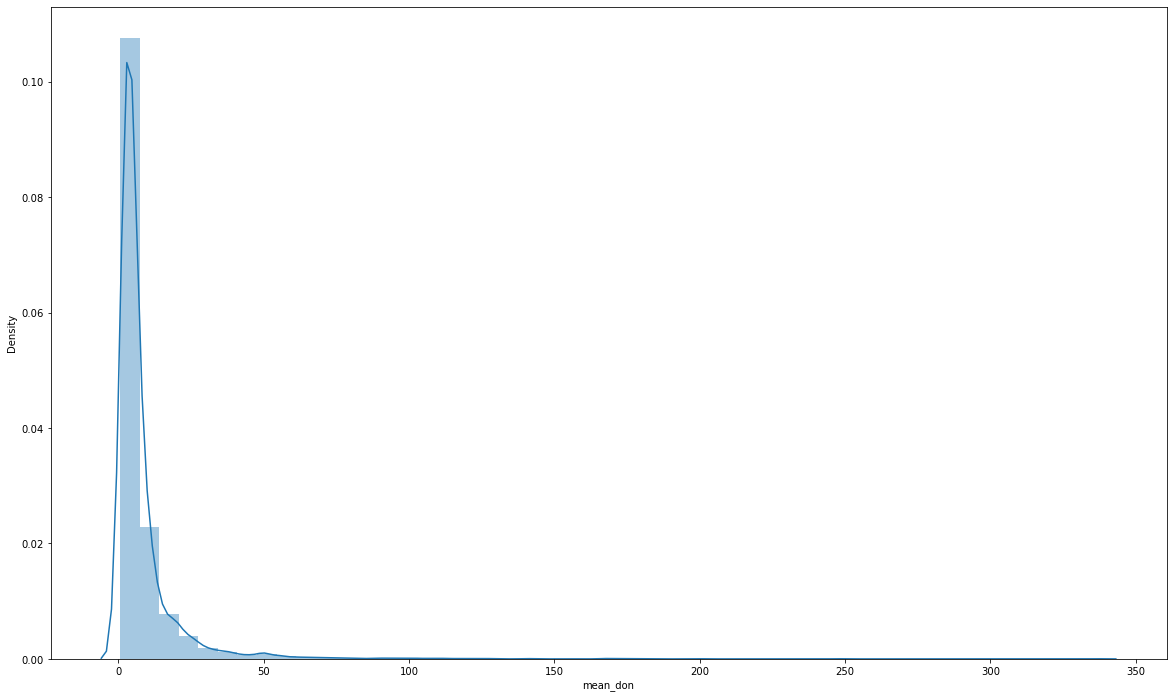

In [22]:
plt.figure(figsize=(20,12))
sns.distplot(data_dons['mean_don']<100)
plt.show()

On remarque ici que la plupart des dons sont situés entre 0 et 20€

# Catégories des youtubers

In [77]:
dataYT = pd.read_excel('dataYT.xlsx')

In [78]:
cate = []
for chaine in don_par_chaine_trier["nom_chaine"]:
    try :
        cate.append(list(dataYT[dataYT['display_name'] == chaine]["category"])[0])
    except IndexError:
        cate.append("Unknown")

don_par_chaine_trier["category"]=cate


In [79]:
don_par_chaine_trier

,nom_chaine,total_don,nbr_don,category
372,casarhema satellite2,122250.41,5518,vie pratique et style
340,Tourdepriere semeur TV,110011.49,9191,vie pratique et style
135,Inoxtag,42056.93,8467,divertissement
146,Joenesteam,27904.13,3876,jeux video
317,THOMAS PARLE FOOT,27654.51,3685,sport
...,...,...,...,...
56,ChaoukiGaming,0.99,1,jeux video
239,NeotikZ,0.99,1,jeux video
18,Angel038,0.99,1,jeux video
323,Tenko,0.71,1,Unknown


In [67]:
fig = px.icicle(don_par_chaine_trier, path=[px.Constant("all"),'category','nom_chaine'], values = 'total_don')
fig.update_traces(root_color="lightgrey")
fig.show()

# Proportion de dons reçus par un youtuber

In [83]:
fig = px.pie(don_par_chaine_trier, values='total_don', names='nom_chaine', title = "Proportion de dons reçus par un youtuber")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Nous voyons que 5 youtubers représentent 50% des dons totaux effectués.

# Création d'un ratio total_don/nb_abo

In [68]:
cate = []
for chaine in don_par_chaine_trier["nom_chaine"]:
    try :
        cate.append(list(dataYT[dataYT['display_name'] == chaine]["subscribers"])[0])
    except :
        cate.append(0)

don_par_chaine_trier["nb_abo"]=cate
don_par_chaine_trier

,nom_chaine,total_don,category,nb_abo
372,casarhema satellite2,122250.41,vie pratique et style,505000.0
340,Tourdepriere semeur TV,110011.49,vie pratique et style,111000.0
135,Inoxtag,42056.93,divertissement,4360000.0
146,Joenesteam,27904.13,jeux video,100000.0
317,THOMAS PARLE FOOT,27654.51,sport,215000.0
...,...,...,...,...
56,ChaoukiGaming,0.99,jeux video,361000.0
239,NeotikZ,0.99,jeux video,33100.0
18,Angel038,0.99,jeux video,4390.0
323,Tenko,0.71,Unknown,0.0


In [69]:
don_par_chaine_trier['ratio total_don/nb_abo']= don_par_chaine_trier["total_don"]/don_par_chaine_trier["nb_abo"]
don_par_chaine_trier

,nom_chaine,total_don,category,nb_abo,ratio total_don/nb_abo
372,casarhema satellite2,122250.41,vie pratique et style,505000.0,0.242080
340,Tourdepriere semeur TV,110011.49,vie pratique et style,111000.0,0.991095
135,Inoxtag,42056.93,divertissement,4360000.0,0.009646
146,Joenesteam,27904.13,jeux video,100000.0,0.279041
317,THOMAS PARLE FOOT,27654.51,sport,215000.0,0.128626
...,...,...,...,...,...
56,ChaoukiGaming,0.99,jeux video,361000.0,0.000003
239,NeotikZ,0.99,jeux video,33100.0,0.000030
18,Angel038,0.99,jeux video,4390.0,0.000226
323,Tenko,0.71,Unknown,0.0,inf


In [70]:
don_par_chaine_trier.replace([np.inf, -np.inf],np.nan, inplace=True)
don_par_chaine_trier.dropna(inplace=True)
don_par_chaine_trier

,nom_chaine,total_don,category,nb_abo,ratio total_don/nb_abo
372,casarhema satellite2,122250.41,vie pratique et style,505000.0,0.242080
340,Tourdepriere semeur TV,110011.49,vie pratique et style,111000.0,0.991095
135,Inoxtag,42056.93,divertissement,4360000.0,0.009646
146,Joenesteam,27904.13,jeux video,100000.0,0.279041
317,THOMAS PARLE FOOT,27654.51,sport,215000.0,0.128626
...,...,...,...,...,...
367,ZeBoO,0.99,jeux video,93700.0,0.000011
56,ChaoukiGaming,0.99,jeux video,361000.0,0.000003
239,NeotikZ,0.99,jeux video,33100.0,0.000030
18,Angel038,0.99,jeux video,4390.0,0.000226


Nous allons a présent tracer la courbe de distribution du ratio montant total de dons par rapport au nombre d'abo pour une chaîne.

In [71]:
import plotly.figure_factory as ff

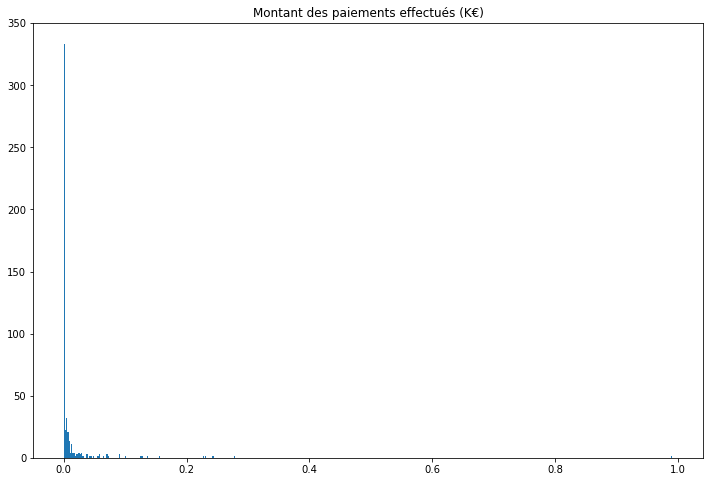

In [72]:
plt.figure(figsize=(12,8))
plt.hist(don_par_chaine_trier['ratio total_don/nb_abo'], bins=500, density=True)
plt.title("Montant des paiements effectués (K€)")
plt.show()